In [160]:
from _helper_basics_ import *
from _helper_gender_ import *
%reload_ext autoreload

## Gender Classification
    http://localhost:8888/notebooks/Personal2_Gender_Audio_Classification/Data_Gen.ipynb#Data_1
    http://localhost:8888/notebooks/Personal2_Gender_Audio_Classification/Data_Gen.ipynb#Data_2
    http://localhost:8888/notebooks/Personal2_Gender_Audio_Classification/Data_Gen.ipynb#Data_3

In [1]:
import sys
## To get helper functions from another folder
# sys.path.insert(0, '../') # if _helper_basics_ is in previous folder
now_i_am_at = 'dso' # home dso test
if now_i_am_at=='home': sys.path.insert(0, 'E:/Leonard HDD/Dropbox/DSO/Tasks/')
elif now_i_am_at=='dso': sys.path.insert(0, 'D:/Dropbox/DSO/Tasks')

from _helper_basics_ import *
from _helper_gender_ import *

%matplotlib inline
plt.rcParams['savefig.dpi'] = 100

%load_ext autoreload
%autoreload 2

print('keras',      keras.__version__)
print('tensorflow', tf.__version__)

Using TensorFlow backend.


keras 2.0.6
tensorflow 1.2.1


In [2]:
nfft = 256
# nfft = 512
# nfft = 600

hop_length = 80 # 10ms of sr=8000
hop_length = nfft//3 # 256 = 30ms

# 0.5 seconds speech is about 48 time_samples
num_freq,num_time,num_channel    = nfft//2+1,48,1

print('nfft:{}'.format(nfft),'hop_length:{}'.format(hop_length),
      '\nnum_freq:{}'.format(num_freq),'num_time:{}'.format(num_time),'num_channel:{}'.format(num_channel))

Spect_Det = [nfft, hop_length, num_freq,num_time,num_channel]


pwd = os.getcwd()
Dataset_dir = os.path.join(pwd,'..','..','..','Speech Audio Text','3) Dataset')
get_immediate_subdirectories(Dataset_dir)

nfft:256 hop_length:85 
num_freq:129 num_time:48 num_channel:1


['AMI',
 'BABEL_CORPUS',
 'Gender',
 'Google_Speech_Commands',
 'MUSAN',
 'Reverb_1',
 'Reverb_2',
 'RIRS_NOISES',
 'Speech MNIST',
 'Speeches',
 'Switchboard',
 'TIMIT',
 'Voice_Converision',
 'z.samples']

## Data_1
    Google Speech Command Dataset
    

In [ ]:
import tarfile

Gog_dir = os.path.join(Dataset_dir, 'Google_Speech_Commands')
Gog_path = os.path.join(Gog_dir, 'speech_commands_v0.01.tar.gz')

tar = tarfile.open(Gog_path, "r:gz")
for member in tar.getmembers():
    f = tar.extractfile(member)
    print(f)
    if f is not None:
        content = f.read()

## Data_2
    Downloaded in https://datashare.is.ed.ac.uk/handle/10283/2211
    Phrases spoken by different people
    But are not aligned as different speakers have different styles and length

In [3]:
Data_2_dir = os.path.join(Dataset_dir,'Voice_Converision', 'Data_2_Datashare','vcc2016_training')
dir_list = get_immediate_subdirectories(Data_2_dir) # =['SF1', 'SF2', 'SF3', 'SM1', 'SM2', 'TF1', 'TF2', 'TM1', 'TM2', 'TM3']
dir_list

['SF1', 'SF2', 'SF3', 'SM1', 'SM2', 'TF1', 'TF2', 'TM1', 'TM2', 'TM3']

In [4]:
dir_list_F,dir_list_M = [],[]
for i in dir_list:
    if 'F' in i: dir_list_F.append(i)
    elif 'M' in i: dir_list_M.append(i)
print('dir_list_F',dir_list_F)
print('dir_list_M',dir_list_M)

dir_list_F ['SF1', 'SF2', 'SF3', 'TF1', 'TF2']
dir_list_M ['SM1', 'SM2', 'TM1', 'TM2', 'TM3']


### Data_2 Details

In [5]:
## all wav file names
WAV_name = []
for i in glob.glob(os.path.join(Data_2_dir,'SF1','*.wav')): 
    WAV_name.append(i[len(Data_2_dir+'SF1')+2:])
# WAV_name # [100001.wav to 100162.wav]

In [9]:
## finding number of hours of this data 

count = 0
num_hrs = 0
for person_dir in dir_list:
    for wav_f in WAV_name:
        count +=1
        x,sr = librosa.load( os.path.join(Data_2_dir,person_dir,wav_f), sr=8000 )
        num_hrs += len(x)
        
print('number of files in total', count, len(WAV_name)*len(dir_list))
print('num_hrs', num_hrs/sr/3600)

number of files in total 1620 1620
num_hrs 1.6136164583333334


In [25]:
shortest_wav_length, longest_wav_length = np.Inf,-1
shortest_stft_time, longest_stft_time   = np.Inf,-1
shortest_wav_file, longest_wav_file = '',''

count = 0
print('dir_list','WAV_name','  len(x)','x_stft.shape')
for person_dir in dir_list:
    for wav_f in WAV_name:
        count +=1
        
        ## WAV
        x,sr = librosa.load( os.path.join(Data_2_dir,person_dir,wav_f), sr=8000 )
        #
        x_len = len(x)
        if   x_len<shortest_wav_length: 
            shortest_wav_length = x_len
            shortest_wav_file = person_dir+'_'+wav_f
        elif x_len>longest_wav_length:   
            longest_wav_length = x_len
            longest_wav_file = person_dir+'_'+wav_f

        ## STFT
        x_stft = librosa.stft(x, n_fft=nfft, hop_length=hop_length) # , dtype=np.float32
        x_stft_mag = np.abs(x_stft)
        x_stft_pha = np.angle(x_stft)
        #
        x_stft_shape = x_stft.shape
        x_stft_time = x_stft_shape[1]
        if   x_stft_time<shortest_stft_time: 
            shortest_stft_time = x_stft_time
            assert shortest_wav_file == person_dir+'_'+wav_f
        elif x_stft_time>longest_stft_time:   
            longest_stft_time = x_stft_time
            assert longest_wav_file == person_dir+'_'+wav_f

print('\nshortest_wav_length',shortest_wav_length)
print('longest_wav_length',longest_wav_length)
print('shortest_stft_time',shortest_stft_time)
print('longest_stft_time',longest_stft_time)
print('shortest_wav_file',shortest_wav_file)
print('longest_wav_file',longest_wav_file)

dir_list WAV_name   len(x) x_stft.shape

shortest_wav_length 7412
longest_wav_length 92451
shortest_stft_time 88
longest_stft_time 1088
shortest_wav_file SM1_100082.wav
longest_wav_file TM3_100096.wav


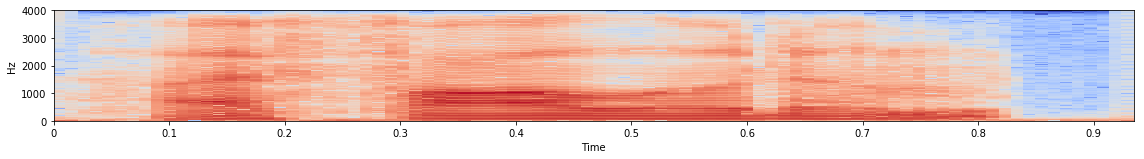

In [32]:
## Shortest audio clip
x,sr = librosa.load( os.path.join(Data_2_dir,'SM1',shortest_wav_file[4:]), sr=8000 )
x_stft = librosa.stft(x, n_fft=nfft, hop_length=hop_length) # , dtype=np.float32
x_stft_mag = np.abs(x_stft)

plt.figure(figsize=(16,4)); k=2;col=1;l=1
display_audio(x, None, sr, 'audio')
plt.subplot(k,col,l); display_audio(librosa.power_to_db(x_stft_mag), None, sr, 'spec', hop_length=hop_length); l+=1
plt.tight_layout()

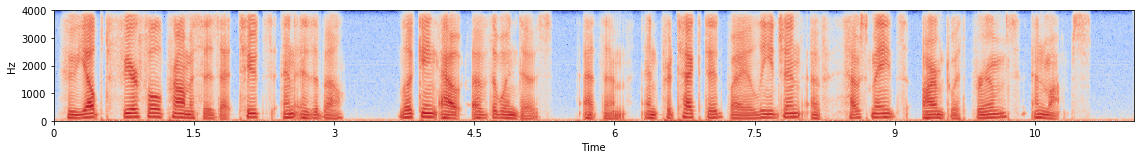

In [41]:
## Longest audio clip
x,sr = librosa.load( os.path.join(Data_2_dir,'TM3',longest_wav_file[4:]), sr=8000 )
x_stft = librosa.stft(x, n_fft=nfft, hop_length=hop_length) # , dtype=np.float32
x_stft_mag = np.abs(x_stft)

plt.figure(figsize=(16,4)); k=2;col=1;l=1
display_audio(x, None, sr, 'audio')
plt.subplot(k,col,l); display_audio(librosa.power_to_db(x_stft_mag), None, sr, 'spec', hop_length=hop_length); l+=1
plt.tight_layout()

SM1
100146.wav


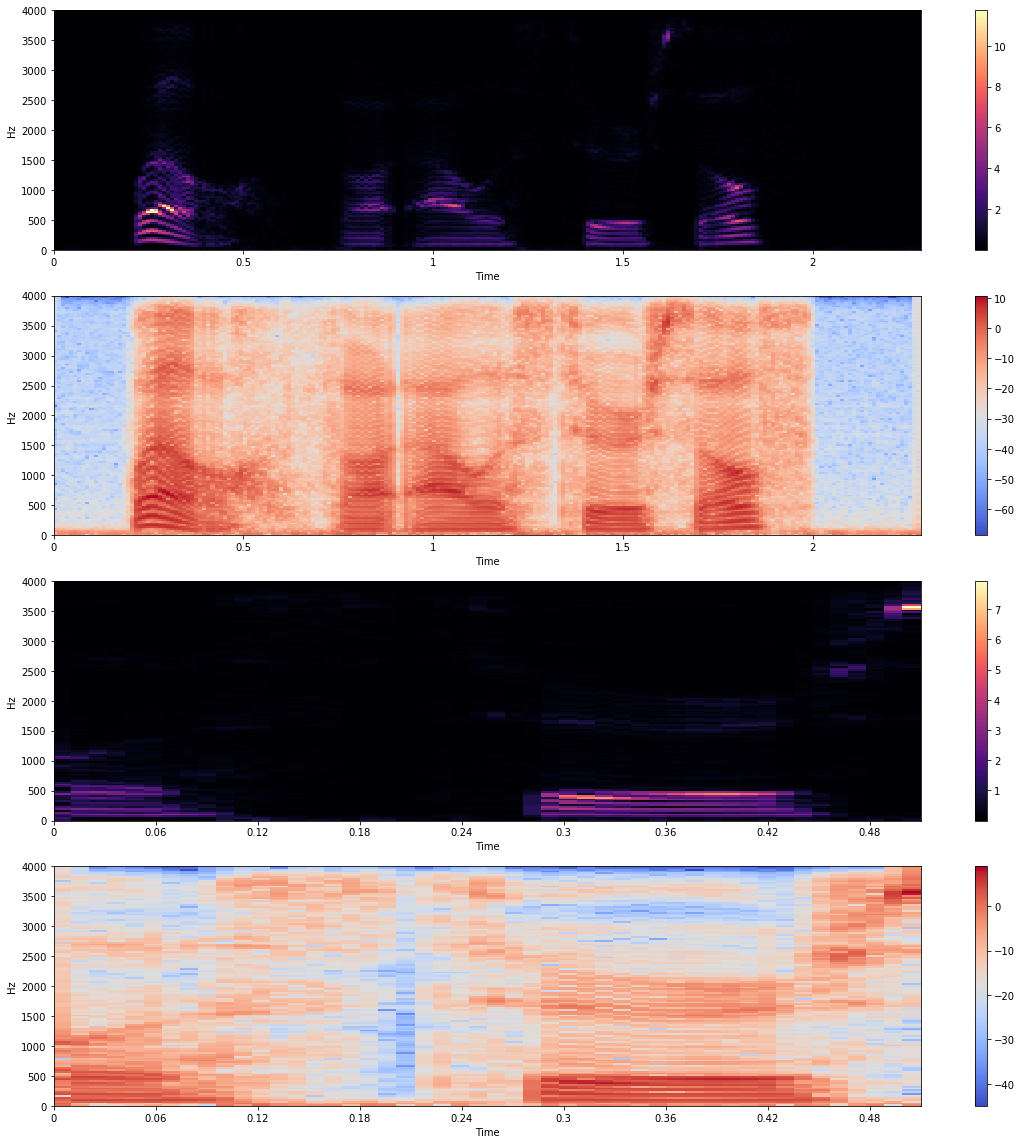

In [63]:
rand_1 = np.random.randint(0, len(dir_list))
print(dir_list[rand_1])

rand_2 = np.random.randint(0, len(WAV_name))
print(WAV_name[rand_2])

x_orig,sr = librosa.load( os.path.join(Data_2_dir,dir_list[rand_1],WAV_name[rand_2]), sr=8000 )
x_stft_orig = librosa.stft(x_orig, n_fft=nfft, hop_length=hop_length) # , dtype=np.float32
x_stft_mag_orig = np.abs(x_stft_orig)

rand_3 = np.random.randint(0,len(x_orig)-4000)
x = x_orig[rand_3:rand_3+4000]
x_stft = librosa.stft(x, n_fft=nfft, hop_length=hop_length) # , dtype=np.float32
x_stft_mag = np.abs(x_stft)
# x_stft_mag = x_stft_mag[:,rand_3:rand_3+48]

plt.figure(figsize=(16,4*k)); k=4;col=1;l=1
display_audio(x_orig, None, sr, 'audio')
display_audio(x, None, sr, 'audio')
plt.subplot(k,col,l); display_audio((x_stft_mag_orig), None, sr, 'spec', hop_length=hop_length,colorbar=1); l+=1
plt.subplot(k,col,l); display_audio(librosa.power_to_db(x_stft_mag_orig), None, sr, 'spec', hop_length=hop_length,colorbar=1); l+=1
plt.subplot(k,col,l); display_audio((x_stft_mag), None, sr, 'spec', hop_length=hop_length,colorbar=1); l+=1
plt.subplot(k,col,l); display_audio(librosa.power_to_db(x_stft_mag), None, sr, 'spec', hop_length=hop_length,colorbar=1); l+=1
plt.tight_layout()

### Train Val Test split

In [251]:
dir_list

['SF1', 'SF2', 'SF3', 'SM1', 'SM2', 'TF1', 'TF2', 'TM1', 'TM2', 'TM3']

In [254]:
TRG_list,VAL_list, TEST_list = [],[],[]
for i in range(len(dir_list)//2):
    if i==3:
        VAL_list.append(dir_list_F[i])
        VAL_list.append(dir_list_M[i])
    elif i==4:
        TEST_list.append(dir_list_F[i])
        TEST_list.append(dir_list_M[i])
    else:
        TRG_list.append(dir_list_F[i])
        TRG_list.append(dir_list_M[i])
print('TRG_list ',TRG_list)
print('VAL_list ',VAL_list)
print('TEST_list',TEST_list)

TRG_list  ['SF1', 'SM1', 'SF2', 'SM2', 'SF3', 'TM1']
VAL_list  ['TF1', 'TM2']
TEST_list ['TF2', 'TM3']


In [233]:
trg_path_list,trg_list = data_2_tdt(TRG_list, Data_2_dir)
print('trg_path_list', len(trg_path_list))
val_path_list,val_list = data_2_tdt(VAL_list, Data_2_dir)
print('val_path_list', len(val_path_list))
test_path_list,test_list = data_2_tdt(TEST_list, Data_2_dir)
print('test_path_list', len(test_path_list))

trg_path_list 972
val_path_list 324
test_path_list 324


### Forming X,Y

In [238]:
X_train_wav,X_train_lps = data_dict(trg_path_list, trg_list, Spect_Det)
dump_load_pickle(os.path.join(pwd,'Data_tdt','train','X_train_wav'), 'dump', X_train_wav)
dump_load_pickle(os.path.join(pwd,'Data_tdt','train','X_train_lps'), 'dump', X_train_lps)
print('X_train_lps', len(X_train_lps))

gen_position = 1
X_train,Y_train = data_lps_c(gen_position, X_train_lps, Spect_Det, energy_s=2000)
dump_load_pickle(os.path.join(pwd,'Data_tdt','train','Y_train'), 'dump', Y_train)
dump_load_pickle(os.path.join(pwd,'Data_tdt','train','X_train'), 'dump', X_train)
print('X_train', X_train.shape)
print('Y_train', Y_train.shape)

count_male_female(Y_train)

X_train (9947, 129, 48, 1)
Y_train (9947, 2)


In [239]:
X_val_wav,X_val_lps = data_dict(val_path_list, val_list, Spect_Det)
dump_load_pickle(os.path.join(pwd,'Data_tdt','val','X_val_wav'), 'dump', X_val_wav)
dump_load_pickle(os.path.join(pwd,'Data_tdt','val','X_val_lps'), 'dump', X_val_lps)
print('X_val_lps', len(X_val_lps))

X_val,Y_val = data_2_lps_c(X_val_lps, Spect_Det, energy_s=2000)
dump_load_pickle(os.path.join(pwd,'Data_tdt','val','Y_val'), 'dump', Y_val)
dump_load_pickle(os.path.join(pwd,'Data_tdt','val','X_val'), 'dump', X_val)
print('X_val', X_val.shape)
print('Y_val', Y_val.shape)

count_male_female(Y_val)

X_val_lps 324
X_val (3266, 129, 48, 1)
Y_val (3266, 2)


In [240]:
X_test_wav,X_test_lps = data_dict(test_path_list, test_list, Spect_Det)
dump_load_pickle(os.path.join(pwd,'Data_tdt','test','X_test_wav'), 'dump', X_test_wav)
dump_load_pickle(os.path.join(pwd,'Data_tdt','test','X_test_lps'), 'dump', X_test_lps)
print('X_test_lps', len(X_test_lps))

X_test,Y_test = data_2_lps_c(X_test_lps, Spect_Det, energy_s=2000)
dump_load_pickle(os.path.join(pwd,'Data_tdt','test','Y_test'), 'dump', Y_test)
dump_load_pickle(os.path.join(pwd,'Data_tdt','test','X_test'), 'dump', X_test)
print('X_test', X_test.shape)
print('Y_test', Y_test.shape)

count_male_female(Y_test)

X_test_lps 324
X_test (3692, 129, 48, 1)
Y_test (3692, 2)


In [41]:
# X_train_wav = dump_load_pickle(os.path.join(pwd,'Data_tdt','train','X_train_wav'), 'load')
# X_train_lps = dump_load_pickle(os.path.join(pwd,'Data_tdt','train','X_train_lps'), 'load')
Y_train = dump_load_pickle(os.path.join(pwd,'Data_tdt','train','Y_train'), 'load')
X_train = dump_load_pickle(os.path.join(pwd,'Data_tdt','train','X_train'), 'load')

# X_val_wav = dump_load_pickle(os.path.join(pwd,'Data_tdt','val','X_val_wav'), 'load')
# X_val_lps = dump_load_pickle(os.path.join(pwd,'Data_tdt','val','X_val_lps'), 'load')
Y_val = dump_load_pickle(os.path.join(pwd,'Data_tdt','val','Y_val'), 'load')
X_val = dump_load_pickle(os.path.join(pwd,'Data_tdt','val','X_val'), 'load')

# X_test_wav = dump_load_pickle(os.path.join(pwd,'Data_tdt','test','X_test_wav'), 'load')
# X_test_lps = dump_load_pickle(os.path.join(pwd,'Data_tdt','test','X_test_lps'), 'load')
Y_test = dump_load_pickle(os.path.join(pwd,'Data_tdt','test','Y_test'), 'load')
X_test = dump_load_pickle(os.path.join(pwd,'Data_tdt','test','X_test'), 'load')

## Data_3
    Timit
    

In [153]:
TIMIT_Gender_Folder = os.path.join(pwd, 'TIMIT_Gender')
if not os.path.exists(TIMIT_Gender_Folder): os.mkdir(TIMIT_Gender_Folder)
TIMIT_Gender_Folder

'E:\\Leonard HDD\\Dropbox\\Meetup\\Deep Learning Developer Course\\Personal2_Gender_Audio_Classification\\TIMIT_Gender'

In [154]:
Data_3_dir = os.path.join(Dataset_dir,'TIMIT')
print( get_immediate_subdirectories(Data_3_dir) )
trg_dir  = os.path.join(Data_3_dir, 'timit_train')

trg_path_list = glob.glob( os.path.join(trg_dir, '*.wav') )
print('len(trg_path_list)',len(trg_path_list))

trg_list = []
for i in trg_path_list:
    trg_list.append( i[len(trg_dir)+1:] )

['test', 'timit_train', 'timit_train - Copy']
len(trg_path_list) 4619


### Data_3 Details

dr5_ftlg0_si1743.wav


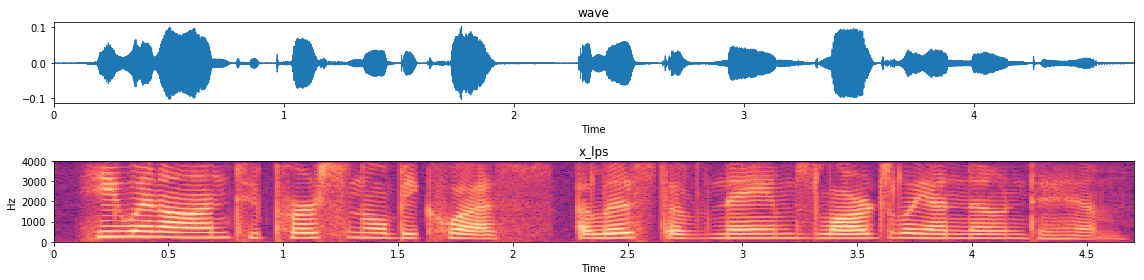

In [155]:
## Random file
idx = np.random.randint(0,len(trg_path_list))

print(trg_path_list[idx][len(trg_dir)+1:])
x,sr = librosa.load( trg_path_list[idx], sr=8000 )
## STFT
x_stft = librosa.stft(x, n_fft=nfft, hop_length=hop_length) # , dtype=np.float32
## LPS
x_lps = librosa.power_to_db(np.abs(x_stft))

plt.figure(figsize=(16,4)); k=2;col=1;l=1
plt.subplot(k,col,l); display_audio(x, 'wave', sr, 'wave'); l+=1
plt.subplot(k,col,l); display_audio(x_lps, 'x_lps', sr, 'spec', hop_length=hop_length); l+=1
plt.tight_layout()
display_audio(x, None, sr, 'audio')

### Forming X,Y

In [9]:
X_train_wav,X_train_lps = data_3_dict(trg_path_list, trg_list, Spect_Det)

if not os.path.exists(os.path.join(TIMIT_Gender_Folder,'train')): os.mkdir(os.path.join(TIMIT_Gender_Folder,'train'))
dump_load_pickle(os.path.join(TIMIT_Gender_Folder,'train','X_train_wav'), 'dump', X_train_wav)
dump_load_pickle(os.path.join(TIMIT_Gender_Folder,'train','X_train_lps'), 'dump', X_train_lps)

In [171]:
gen_position = 4
X_train,Y_train = data_lps_c(gen_position, X_train_lps,Spect_Det, energy_s=2000)
print('X_train',X_train.shape)
print('Y_train',Y_train.shape)

X_train (40739, 129, 48, 1)
Y_train (40739, 2)


In [182]:
dump_load_pickle(os.path.join(TIMIT_Gender_Folder,'train','Y_train'), 'dump', Y_train)
dump_load_pickle(os.path.join(TIMIT_Gender_Folder,'train','X_train'), 'dump', X_train)

'dumped file_Name'

### Loading

In [157]:
X_train_wav = dump_load_pickle(os.path.join(TIMIT_Gender_Folder,'train','X_train_wav'), 'load')
X_train_lps = dump_load_pickle(os.path.join(TIMIT_Gender_Folder,'train','X_train_lps'), 'load')
Y_train     = dump_load_pickle(os.path.join(TIMIT_Gender_Folder,'train','Y_train'), 'load'
X_train     = dump_load_pickle(os.path.join(TIMIT_Gender_Folder,'train','X_train'), 'load'

In [229]:
from _helper_basics_ import *
from _helper_gender_ import *
%reload_ext autoreload